In [1]:
# 加载matplotlib。pyplot库
import matplotlib.pyplot as plt
#让图形在notebook中自动显示
% matplotlib inline

# 加载pandas库（用于数据管理）
import pandas as pd
import numpy as np
# 加载seaborn库
import seaborn as sns
# 华文细黑是相对而言显示效果极好的中文字体
plt.rcParams["font.family"] = "STXIHEI"

#准备CCSS数据集
ccss = pd.read_excel("ccss_sample.xlsx")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


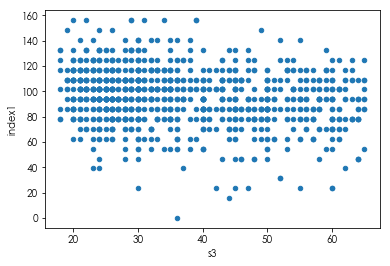

In [2]:
ccss.plot.scatter('s3', 'index1')

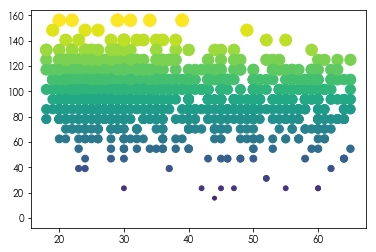

In [3]:
plt.scatter(ccss.s3, ccss.index1, s = ccss.index1, c = ccss.index1)

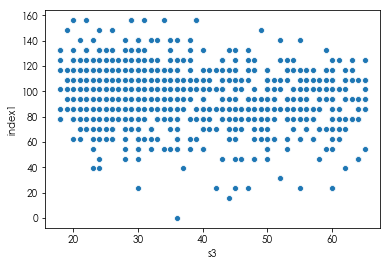

In [4]:
sns.scatterplot(ccss.s3, ccss.index1)

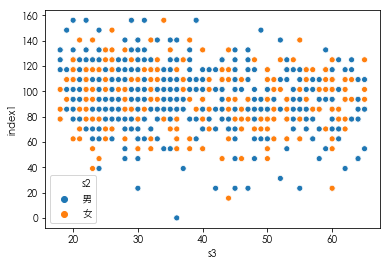

In [5]:
# 分组散点图
sns.scatterplot(ccss.s3, ccss.index1, ccss.s2)

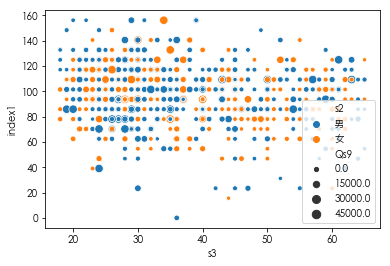

In [9]:
sns.scatterplot(ccss.s3, ccss.index1, ccss.s2, size = ccss.Qs9)#, legend = "full"

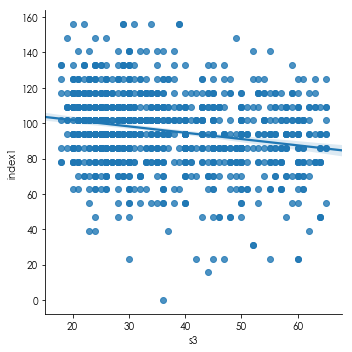

In [10]:
sns.lmplot(x = "s3", y = "index1", data = ccss)

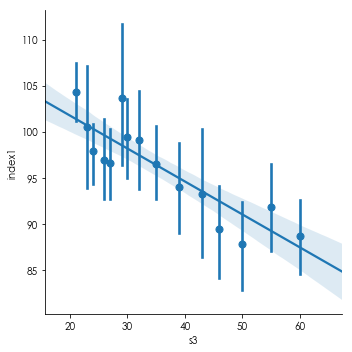

In [11]:
# 对年龄进行分段散点图呈现，分段后呈现因变量CI而不是原始数值
sns.lmplot(x = "s3", y = "index1", data = ccss, x_bins = 15)

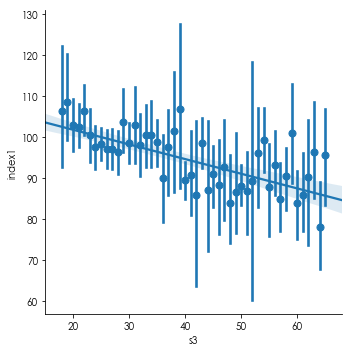

In [14]:
# 不分段呈现因变量CI而不是原始数值
sns.lmplot(x = "s3", y = "index1", data = ccss, x_estimator = np.mean)

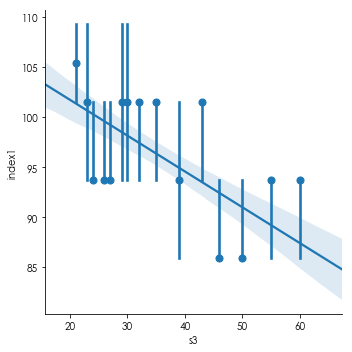

In [15]:
# 分段进行特殊指标的CI估计
sns.lmplot(x = "s3", y = "index1", data = ccss, x_bins = 15,
           x_estimator = np.median)

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\regression.py:315: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


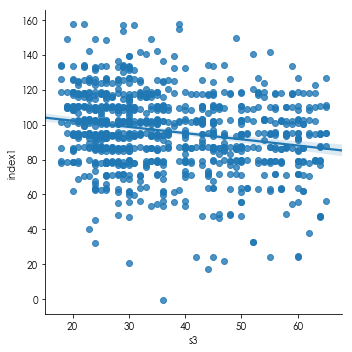

In [16]:
# 在模型中控制更多自变量
sns.lmplot(x = "s3", y = "index1", data = ccss, y_partial = "Qs9")

In [18]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


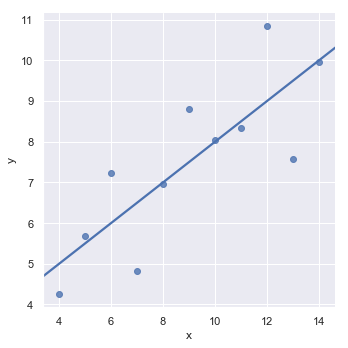

In [21]:
sns.set()
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'I'"),
           ci = None)

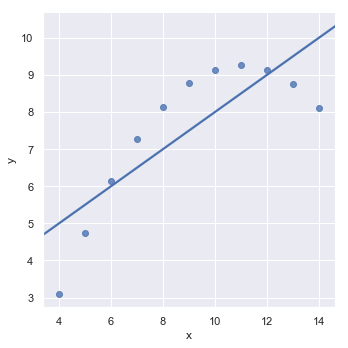

In [22]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"),
           ci = None)

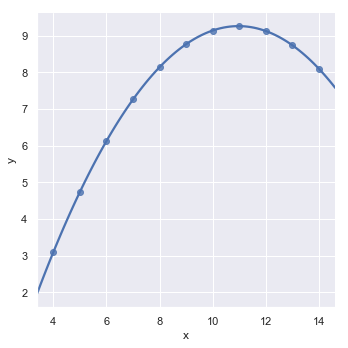

In [23]:
# 直接指定拟合高次项
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"),
           order = 2, ci = None)

In [24]:
# 生成所需的高次项
data2 = anscombe.query("dataset == 'II'")
data2['x2'] = (data2.x - 9)**2
data2

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,x,y,x2
11,II,10.0,9.14,1.0
12,II,8.0,8.14,1.0
13,II,13.0,8.74,16.0
14,II,9.0,8.77,0.0
15,II,11.0,9.26,4.0
16,II,14.0,8.10,25.0
17,II,6.0,6.13,9.0
18,II,4.0,3.10,25.0
19,II,12.0,9.13,9.0
20,II,7.0,7.26,4.0


c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\regression.py:315: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


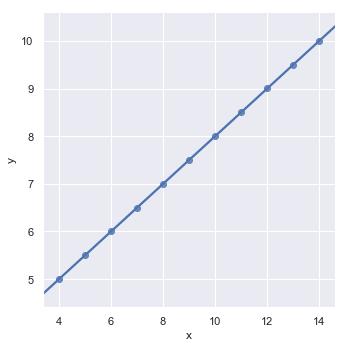

In [25]:
# 在回归模型中控制高次项
sns.lmplot(x = "x", y = "y", data = data2, y_partial = 'x2')

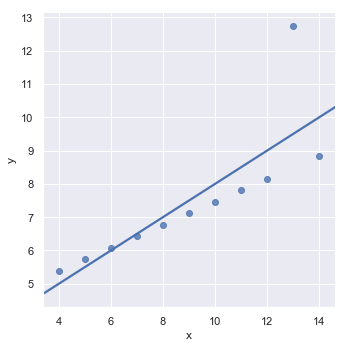

In [26]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"),
           ci = None)

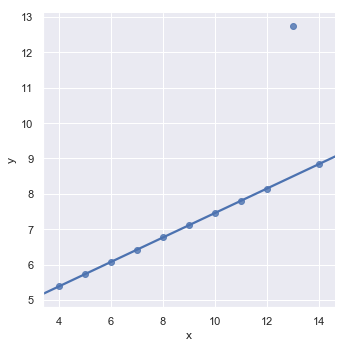

In [27]:
# 拟合稳健回归模型
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"),
           robust = True, ci = None)

In [28]:
ccss.O1.value_counts()

没有    832
有     312
Name: O1, dtype: int64

In [29]:
ccss['O1logic'] = ccss.O1 == '有'
ccss.O1logic.value_counts()

False    835
True     312
Name: O1logic, dtype: int64

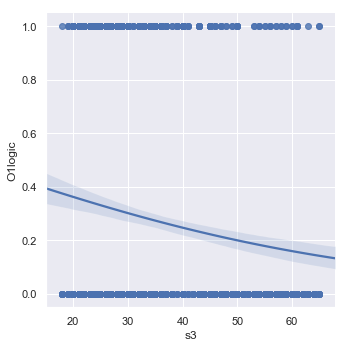

In [31]:
# 拟合logistic回归曲线
sns.lmplot(x = "s3", y = "O1logic", data = ccss, logistic = True)

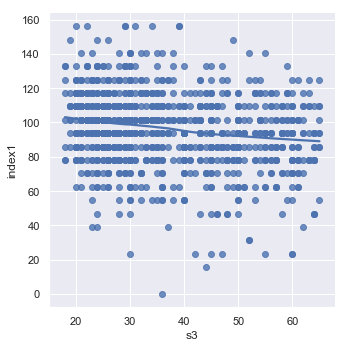

In [32]:
# 拟合lowess曲线
sns.lmplot(x = "s3", y = "index1", data = ccss, lowess = True)

(80, 110)

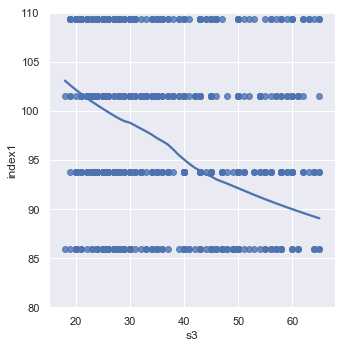

In [35]:
# 放大回归细节以便观察
sns.lmplot(x = "s3", y = "index1", data = ccss, lowess = True)
plt.ylim(80, 110)

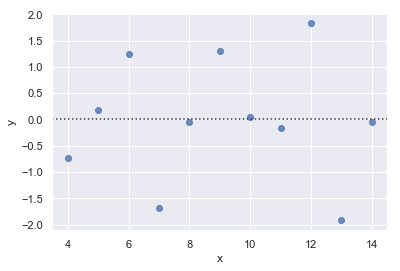

In [36]:
sns.residplot(x = "x", y = "y", data = anscombe.query("dataset == 'I'"))

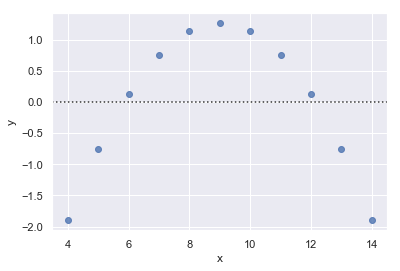

In [38]:
# 处理分布不理想的残差
sns.residplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"))

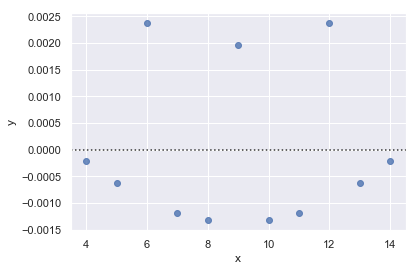

In [39]:
sns.residplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"),
              order = 2)

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\regression.py:315: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


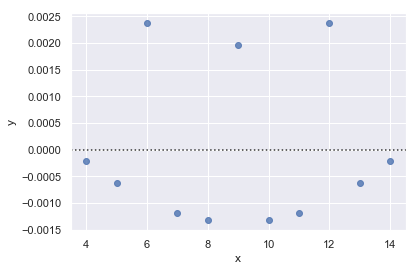

In [41]:
# 最新版本会报错， 老版本可以运行
sns.residplot(x = "x", y = "y", y_partial = "x2", data = data2)

(80, 110)

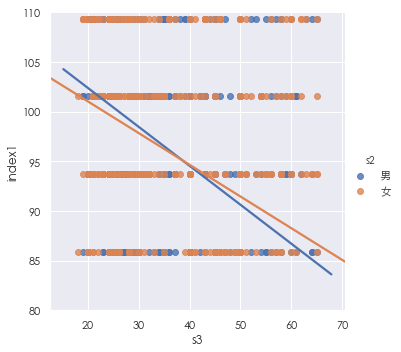

In [46]:
# 图例分组
sns.lmplot(x = "s3", y = "index1", hue = "s2", data = ccss, ci =None)
plt.ylim(80, 110)

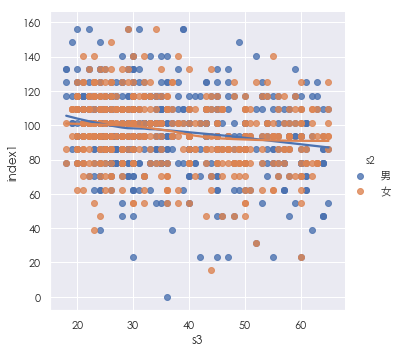

In [47]:
sns.lmplot(x = "s3", y = "index1", hue = "s2", data = ccss, lowess = True)

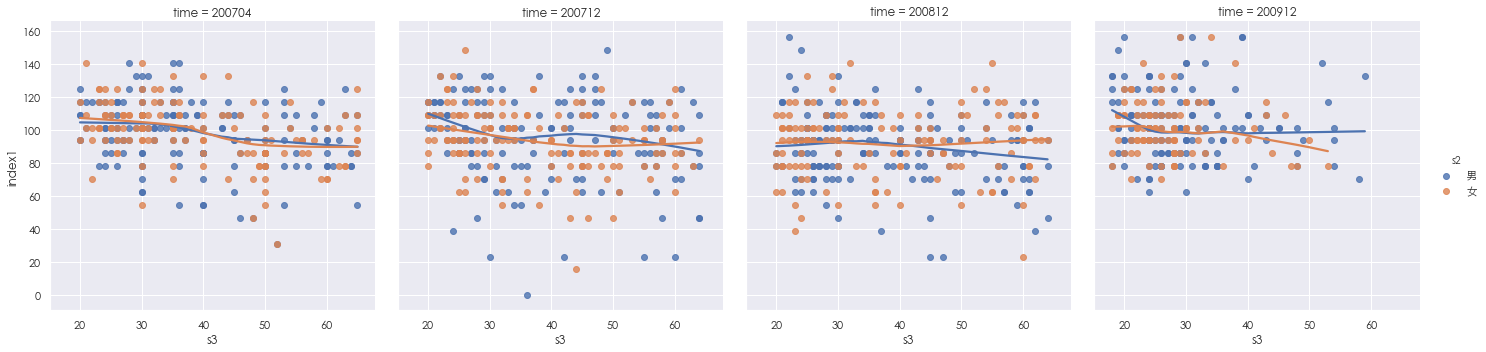

In [48]:
# 行列面板
sns.lmplot(x = "s3", y = "index1", hue = "s2", col = "time", 
            data = ccss, lowess =True)

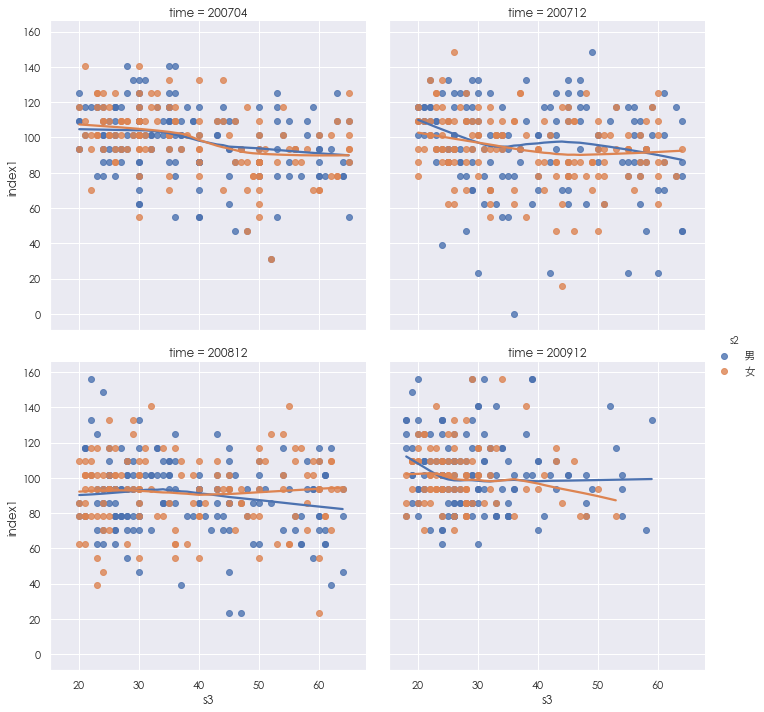

In [49]:
# 行列面板
sns.lmplot(x = "s3", y = "index1", hue = "s2", col = "time", 
            data = ccss, lowess =True, col_wrap = 2)

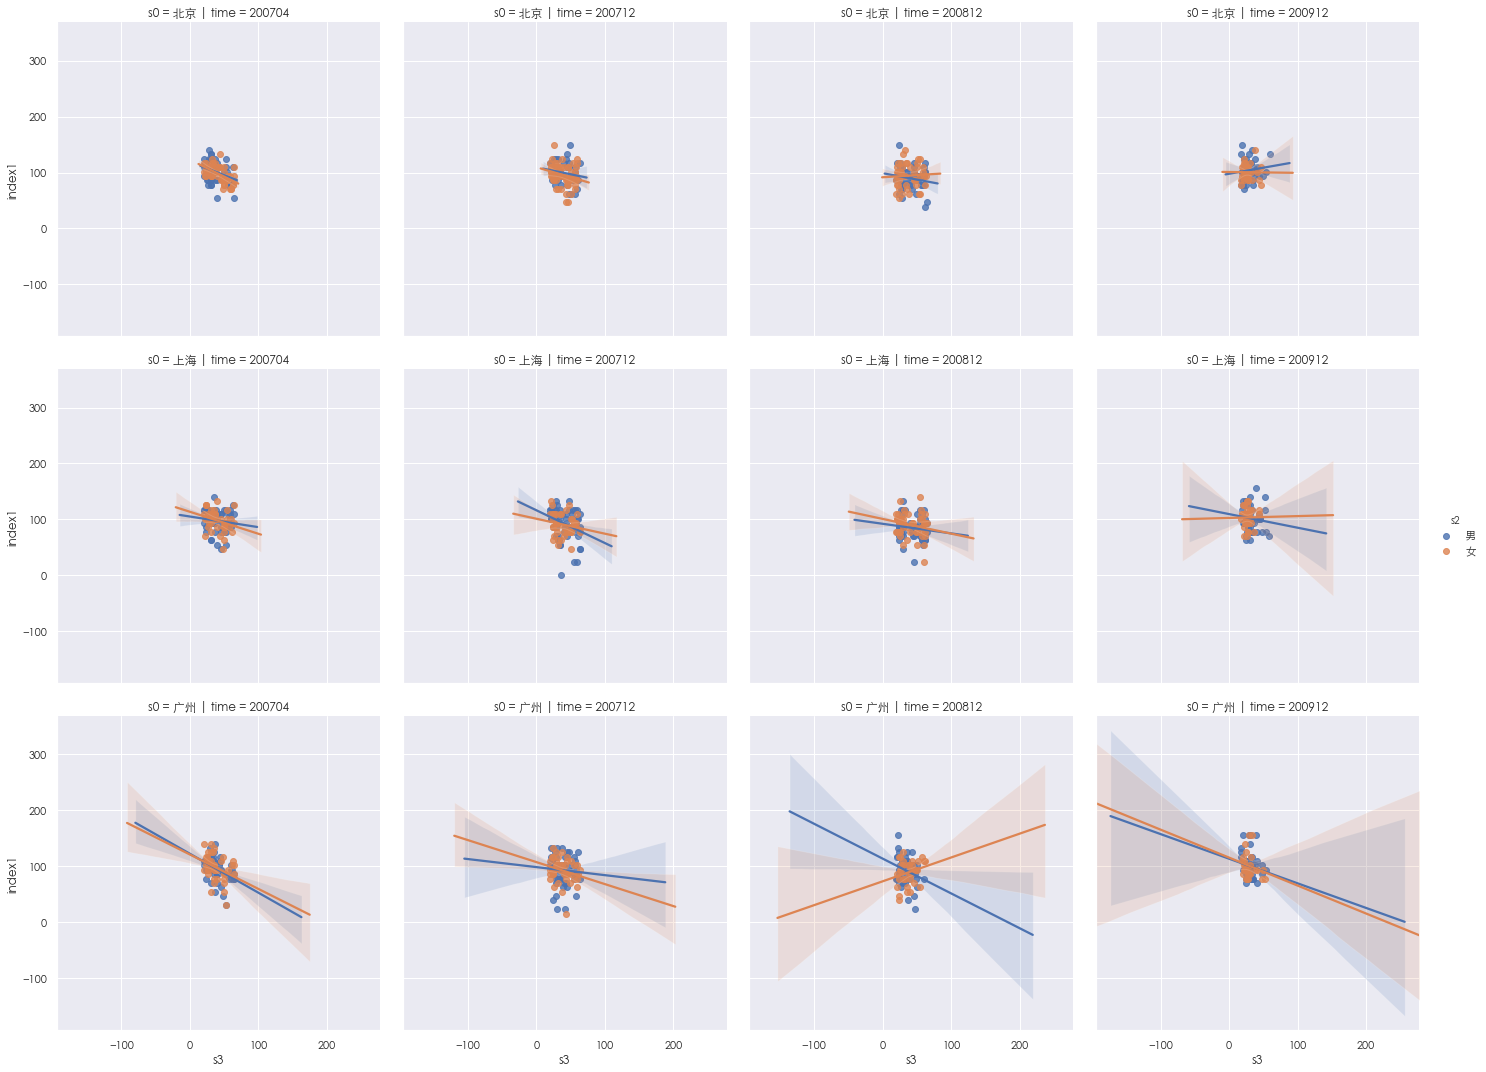

In [51]:
# 原始的行列面板显示
sns.lmplot(x = "s3", y = "index1", hue = "s2", row = "s0",
           col = "time", data = ccss)

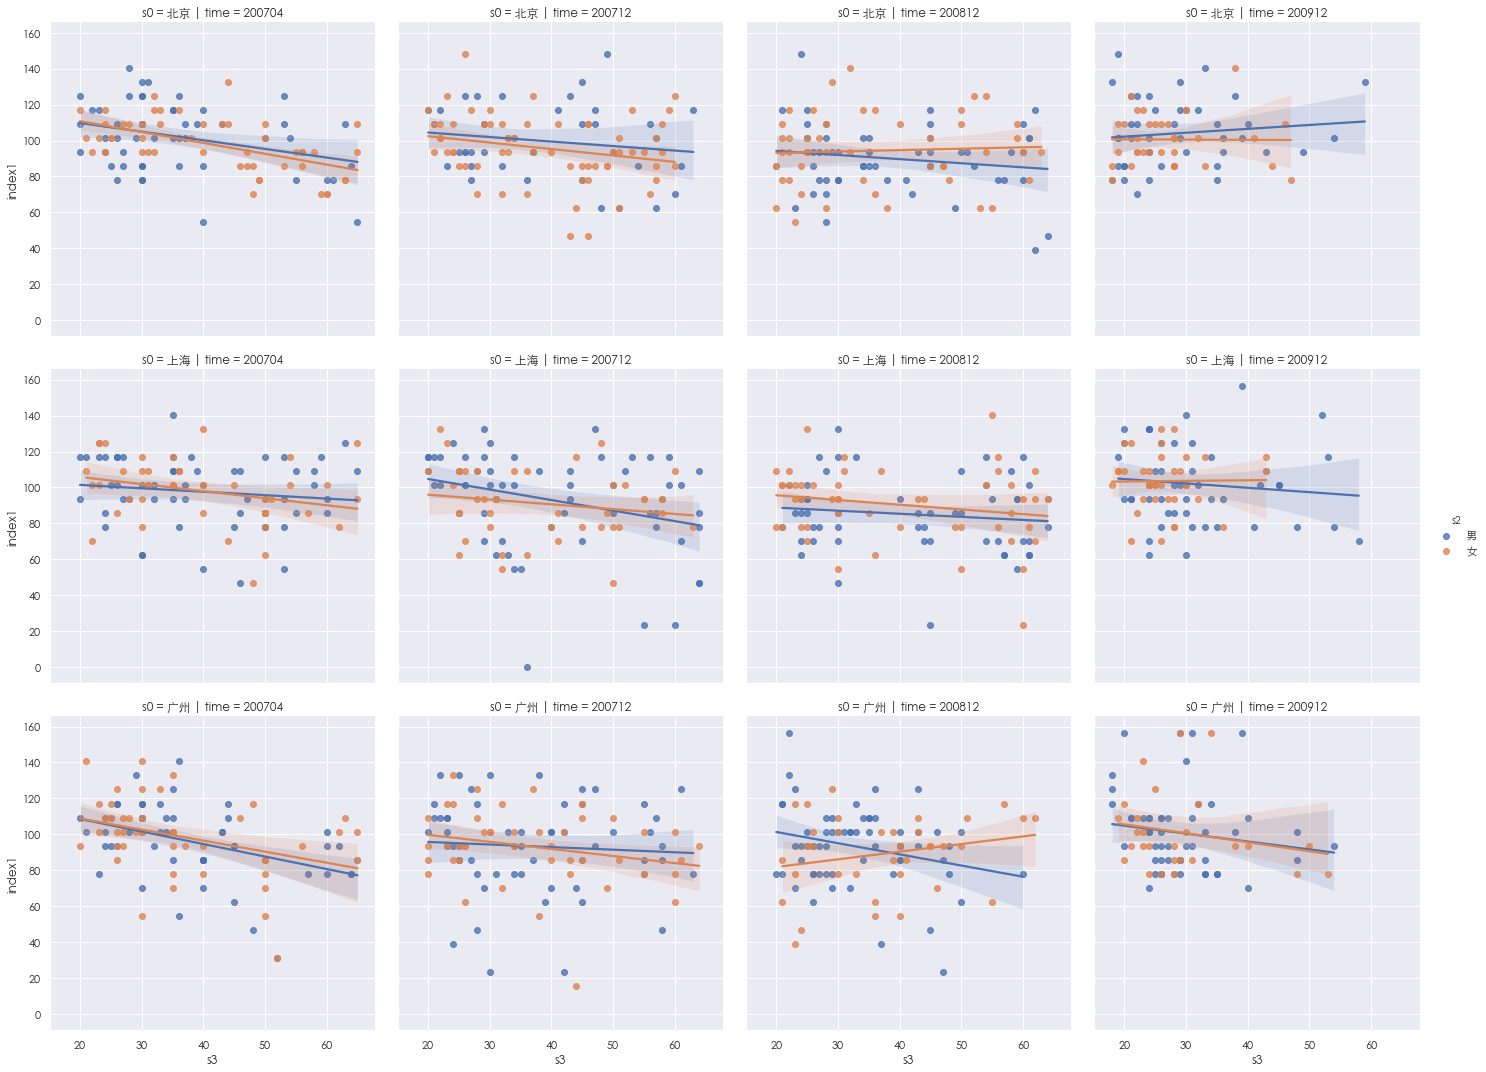

In [52]:
# 调整回归线显示范围
sns.lmplot(x = "s3", y = "index1", hue = "s2", row = "s0",
           col = "time", data = ccss, truncate = True)

In [ ]:
# 不共用x轴

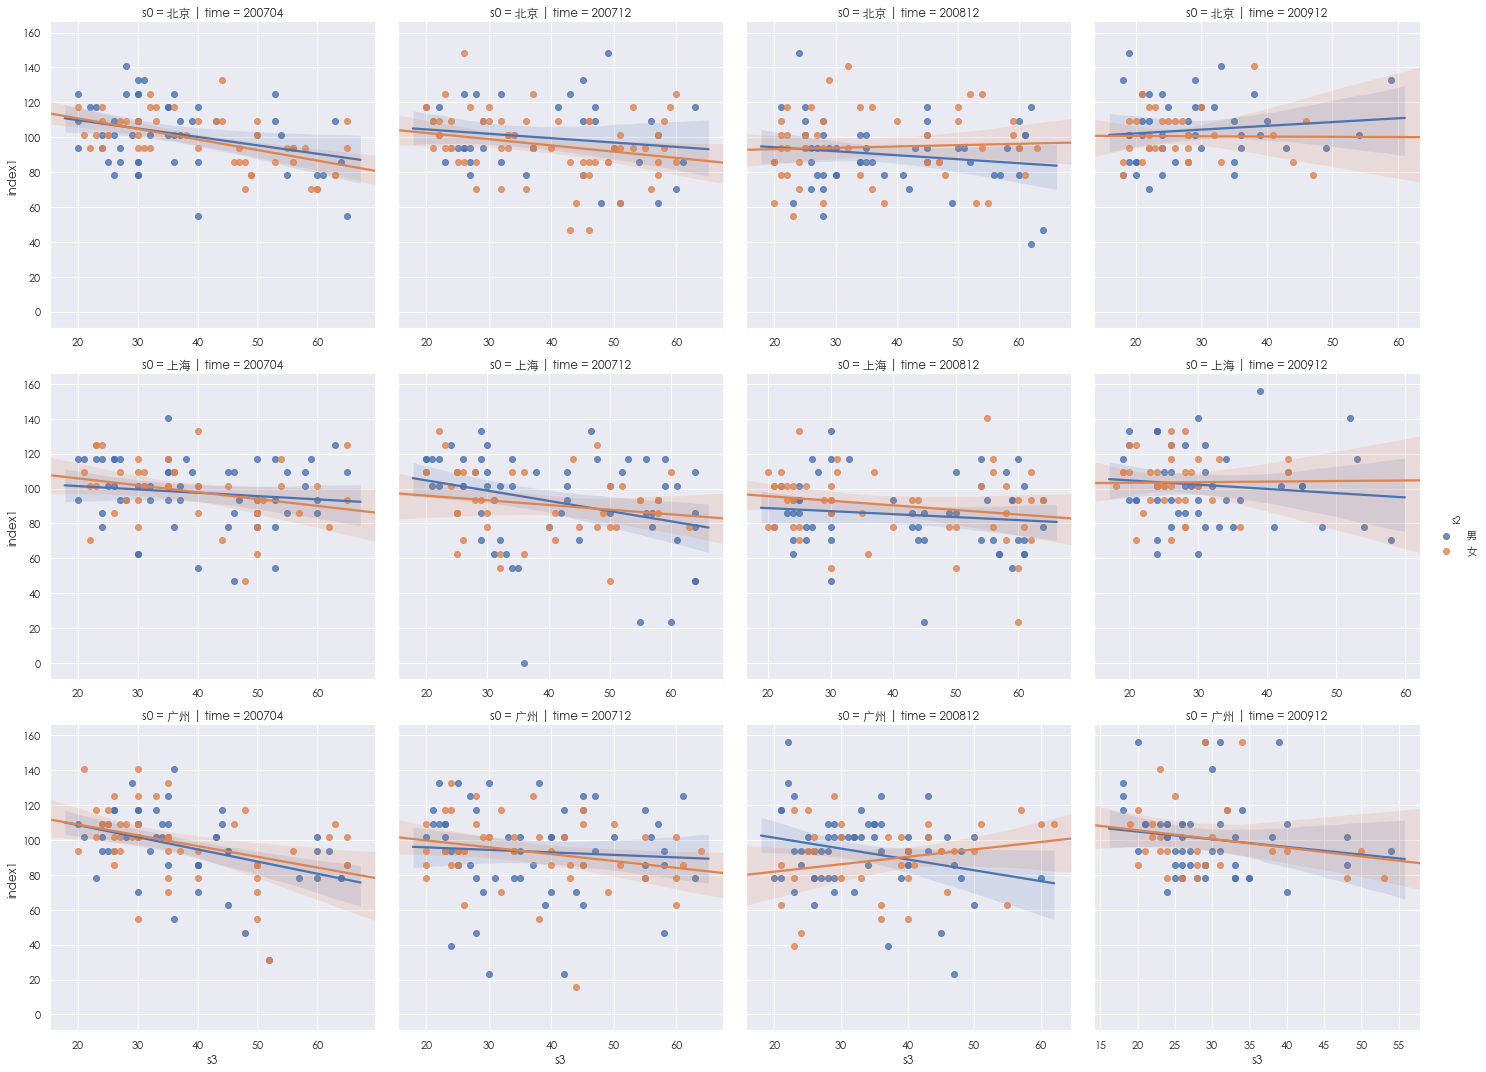

In [53]:
sns.lmplot(x = "s3", y = "index1", hue = "s2", row = "s0",
           col = "time", data = ccss, sharex = False)

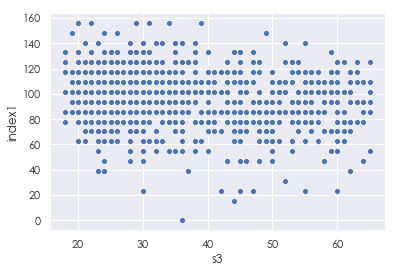

In [55]:
sns.scatterplot(x = "s3", y = "index1", data = ccss)

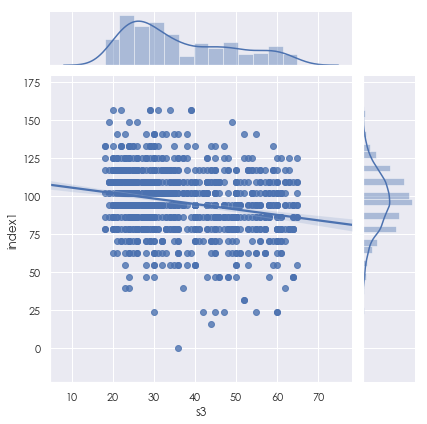

In [58]:
sns.jointplot(x = "s3", y = "index1", data = ccss, kind = 'reg')

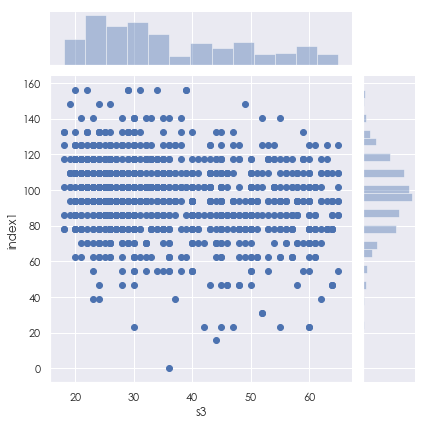

In [61]:
# 错误但不影响使用的调用方法
sns.jointplot(x = ccss.s3, y = ccss.index1, data = ccss)#, data = ccss

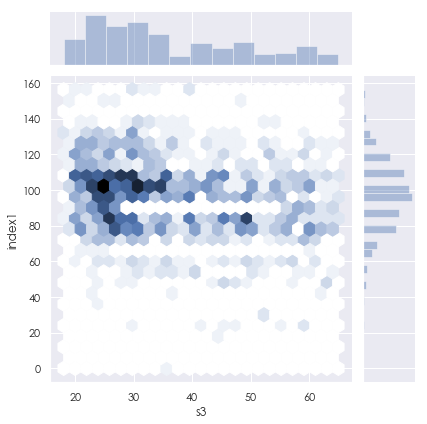

In [62]:
# 使用jointplot绘制hexbin图
sns.jointplot(x = "s3", y = "index1", data = ccss, kind = 'hex')

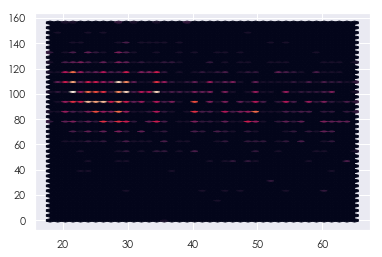

In [63]:
# 使用jointplot绘制hexbin图
plt.hexbin(x = ccss.s3, y = ccss.index1, gridsize = (40, 40))

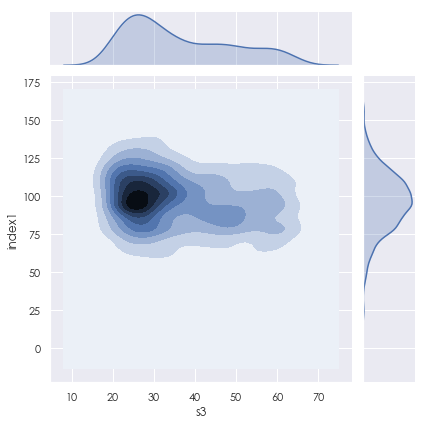

In [64]:
sns.jointplot(x = "s3", y = "index1", data = ccss, kind = 'kde')

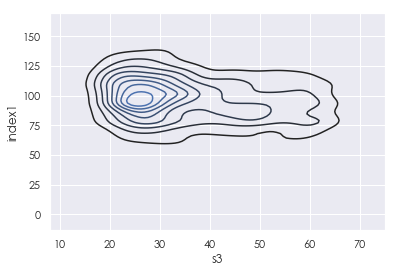

In [65]:
# 只绘制等高线图
sns.kdeplot(ccss.s3, ccss.index1)

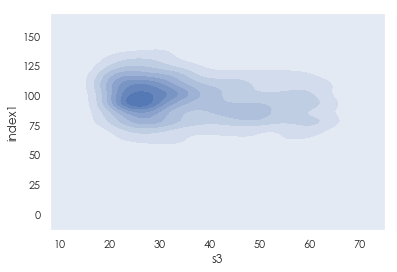

In [71]:
# 让曲线过渡尽量平滑
sns.kdeplot(ccss.s3, ccss.index1, shade = True, n_levels = 10)

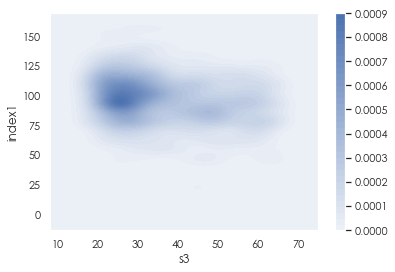

In [73]:
# 在图形边加绘数值条
sns.kdeplot(ccss.s3, ccss.index1, shade = True, 
            cbar = True, n_levels = 40)

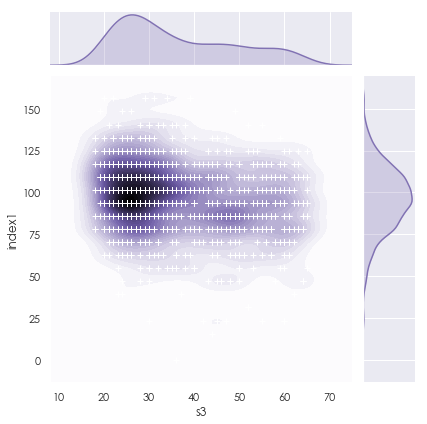

In [74]:
g = sns.jointplot(ccss.s3, ccss.index1, kind = 'kde',
                  n_levels = 40, color = "m")
# 在已有图形基础上加绘散点图
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")

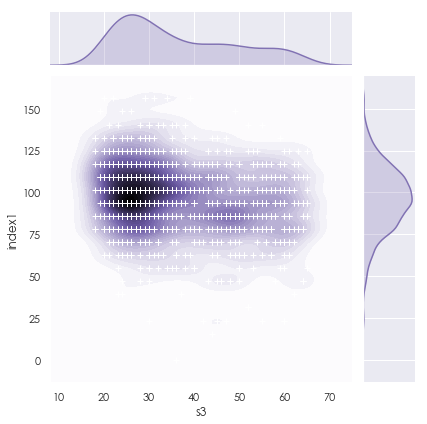

In [75]:
# 在一条语句中完成上述操作
sns.jointplot(ccss.s3, ccss.index1, kind = 'kde',
              n_levels = 40, color = "m")\
     .plot_joint(plt.scatter, c = "w", s = 30, lw = 1, marker = "+")

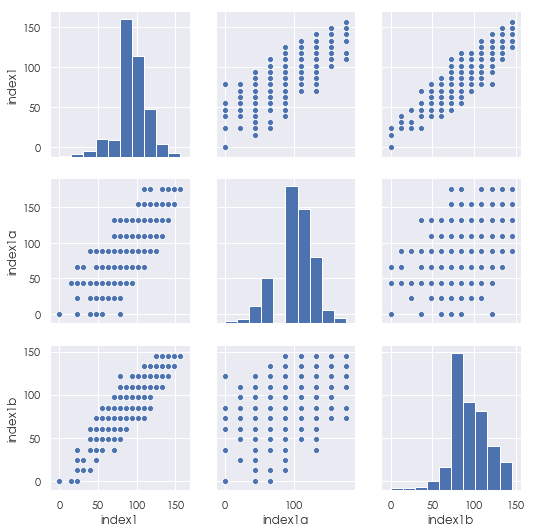

In [76]:
sns.pairplot(data = ccss, vars = ['index1', 'index1a', 'index1b'])

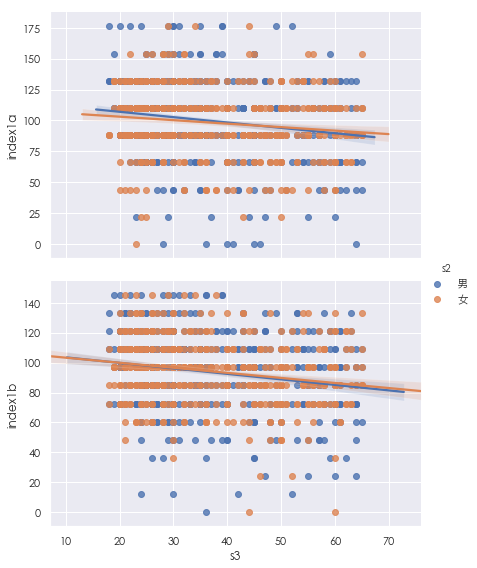

In [77]:
sns.pairplot(data = ccss, x_vars = 's3',
             y_vars = ['index1a', 'index1b'],
             kind = 'reg', hue = 's2', height = 4, aspect = 1.5)

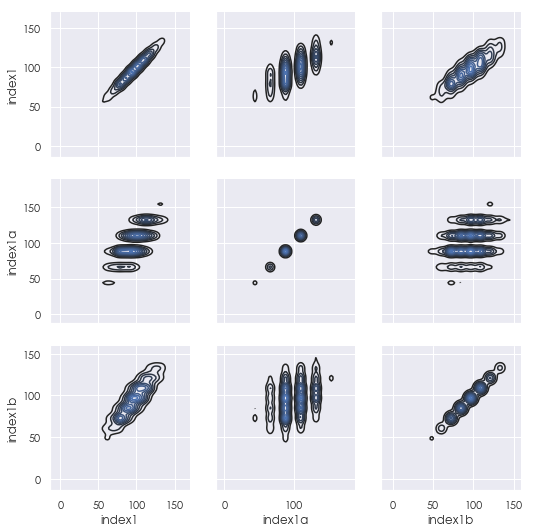

In [78]:
sns.PairGrid(data = ccss,
             vars = ['index1', 'index1a', 'index1b']).map(sns.kdeplot)

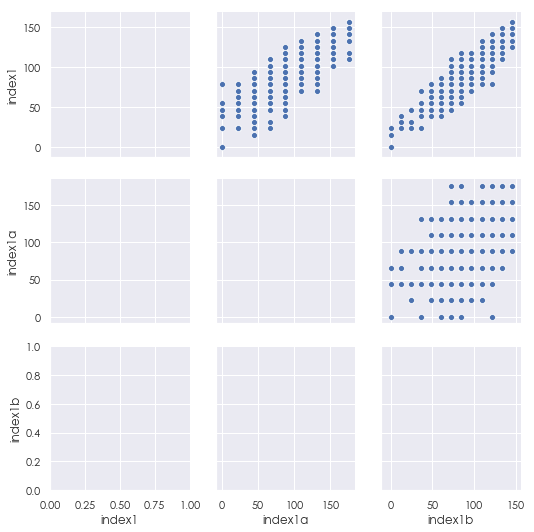

In [79]:
sns.PairGrid(data = ccss,
             vars = ['index1', 'index1a', 'index1b']).map_upper(sns.scatterplot)

In [2]:
% matplotlib qt5
# from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(ccss.s3, ccss.index1a, ccss.index1b)
plt.show()